In [1]:
import sys
sys.path.append('../../src/robustness/new')
from file1 import load_dataframes
import matplotlib.pyplot as plt

import fssa
import numpy as np
from scipy.interpolate import interp1d

%matplotlib inline

In [22]:
net_type = 'DT'
param = 3.50
param = 'param'
attack = 'Ran'
spline = False
min_seeds = 1000

sizes = [
    1024#, 2048, 4096, 
    #8192, 16384, 32768, 65536
]

if net_type == 'ER':
    meank = param
    fc = 1 - 1/meank
else:
    fc = 0.5
print(f'fc = {fc:.5f}')

dfs_fast = load_dataframes(
    net_type, param, attack, sizes, 
    nseeds=min_seeds, spline=spline,
    method='heap'
)
dfs_cpp = load_dataframes(
    net_type, param, attack, sizes, 
    nseeds=min_seeds, spline=spline,
    method='cpp'
)
sizes = list(sorted(dfs_fast.keys()))
print(sizes)
max_size = max(sizes)

fc = 0.50000
[1024]


In [23]:
dfs_fast[1024]

,f,Sgcc,varSgcc,Nsec,meanS,chiDelta
0,0.000000,1.000000,0.000000,0.000,1.0,0.0
1,0.000977,0.999023,0.000000,0.000,1.0,0.0
2,0.001953,0.998047,0.000000,0.000,1.0,0.0
3,0.002930,0.997070,0.000000,0.000,1.0,0.0
4,0.003906,0.996094,0.000000,0.000,1.0,0.0
...,...,...,...,...,...,...
1019,0.995117,0.000123,0.000231,1.000,1.0,0.0
1020,0.996094,0.000082,0.000157,1.000,1.0,0.0
1021,0.997070,0.000045,0.000088,1.000,1.0,0.0
1022,0.998047,0.000008,0.000016,0.996,1.0,0.0


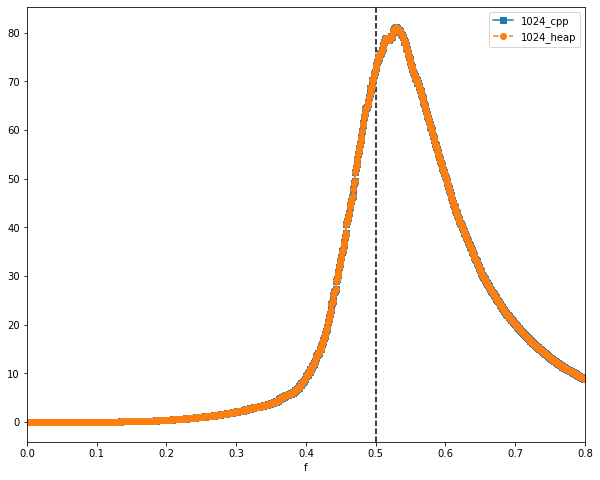

In [25]:
fmin, fmax = 0.5, 0.8
fmin, fmax = 0., 0.8

fig, ax = plt.subplots(figsize=(10,8), ncols=1, nrows=1)

ax.axvline(fc, linestyle='--', color='k')
ax.set_xlim(fmin, fmax)

labels = ['cpp', 'heap']
for i, dfs in enumerate([dfs_cpp, dfs_fast]):
    for size in sizes:
        df = dfs[size]
        #ax.set_ylim(1, 1.05*dfs[max_size].meanS.max())
        linestyle= '--' if i else '-'
        marker = 'o' if i else 's'
        df.plot(
            x='f', y='Nsec', 
            ax=ax, label=f'{size}_{labels[i]}', linestyle=linestyle,
            marker=marker
        )

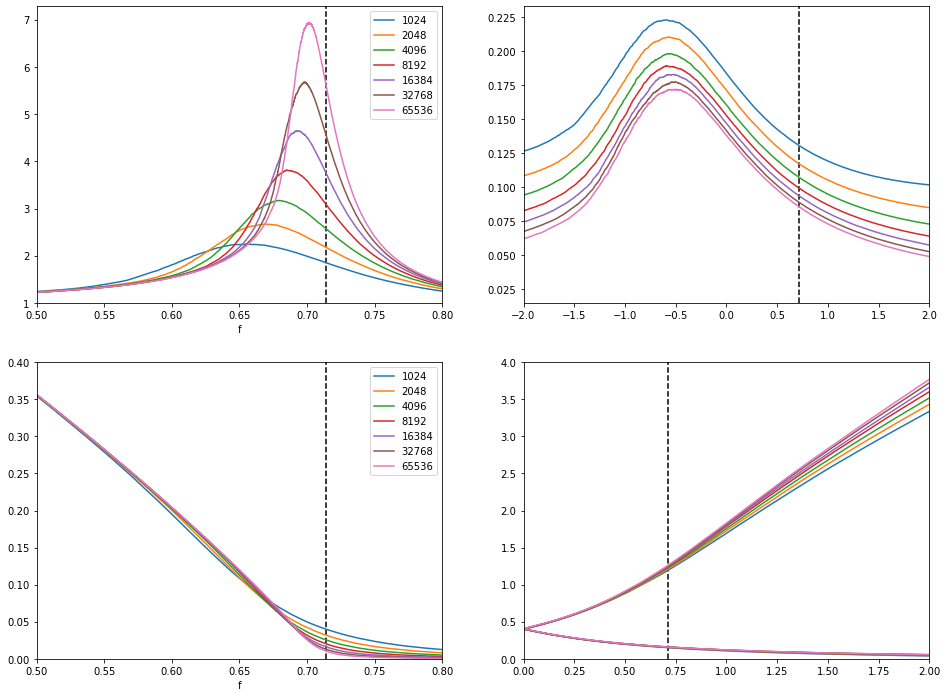

In [5]:
fmin, fmax = 0.5, 0.8
f_values = dfs[max_size].f.values
f_values = f_values[(f_values>= fmin) & (f_values<=fmax)]

data = {
    'meanS': np.zeros((len(sizes), len(f_values))),
    'Sgcc': np.zeros((len(sizes), len(f_values)))
}
data_err = {}

fig, axes = plt.subplots(figsize=(16,12), ncols=2, nrows=2)

for ax in axes.flatten():
    ax.axvline(fc, linestyle='--', color='k')
    ax.set_xlim(fmin, fmax)
    
for size in sizes:
    df = dfs[size]
    ax = axes[0][0]
    ax.set_ylim(1, 1.05*dfs[max_size].meanS.max())
    df.plot(x='f', y='meanS', ax=ax, label=size)
    
ax = axes[0][1]
for i, size in enumerate(sizes):
    df = dfs[size]
    _size = df.Sgcc.values[0]*size
    X = df.f
    Y = df.meanS
    ax.set_xlim(-2, 2)
    ax.plot((X-fc)*size**(1/3), Y*size**(-1/3))
    
for size in sizes:
    df = dfs[size]
    ax = axes[1][0]
    ax.set_ylim(0, .4)
    df.plot(x='f', y='Sgcc', ax=ax, label=size)
    
ax = axes[1][1]
for i, size in enumerate(sizes):
    df = dfs[size]
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 4)
    X = df.f
    Y = df.Sgcc
    ax.plot(np.fabs((X-fc)*size**(1/3)), Y*size**(1/3))

['0 1 3', '1 0 2 3', '2 1 3', '3 0 1 2 4 5', '4 3 5', '5 3 4']


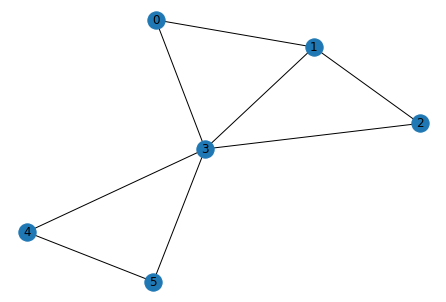

In [43]:
adjlist = [{1, 3}, {0, 2, 3}, {1, 3}, {0, 1, 2, 4, 5}, {3, 5}, {3, 4}]
adjlist = [' '.join(map(str, [i] + list(line))) for i, line in enumerate(adjlist)]
print(adjlist)
import networkx as nx

g = nx.parse_adjlist(adjlist)
pos=nx.spring_layout(g)
nx.draw(g, pos=pos)
nx.draw_networkx_labels(g, pos=pos);

In [33]:
import path
from datetime import datetime
p = path.Path('asd.txt')
datetime.fromtimestamp(p.lstat().st_ctime)

datetime.datetime(2021, 5, 19, 15, 53, 19, 700333)

In [28]:
!touch asd.txt